

# Project: Investigate a Dataset - No Show Appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics that determines whether a patient shows up for appionment or not are represented by the columns.

Brief description of the features in the database
 1.   PatientId - ID for the patient. Has a datatype of float      
 2.   AppointmentID   -An ID for the appointment schedule for the patient.Has a datatype of int. 
 3.   Gender          -States the sex of the patient. M for male and F for female. Has a datatype of string
 4.   ScheduledDay    -State the date the appiontment was scheduled. Has a datatype of string.
 5.   AppointmentDay  -State the date the appointment is to take place. Has a datatype of string.
 6.   Age             -State the age of the patient. Has a datatype of string.
 7.   Neighbourhood   -State where the appointment is to take place. Has a datatype of string
 8.   Scholarship     -State wheather the patient recieve some kind of sponsorship. State 1 if the patient does or 0 is the                       -patient does not.Has a datatype of int.
 9.   Hipertension    -State wheather the patient has hypertension. State 1 if the patient does or 0 is the                                        patient does not.Has a datatype of int.
 10.   Diabetes       -State wheather the patient has diabetes. State 1 if the patient does or 0 is the                                            patient does not.Has a datatype of int.
 11.  Alcoholism      -State wheather the patient is an alcoholic. State 1 if the patient does or 0 is the                                         patient does not.Has a datatype of int.
 12.  Handcap         -State the number of predicamets of the patient. It has 4 values ie. 0-4. 0 means the patient has no                         predicament...
 13.  SMS_received    -State wheather the patient received SMS on appointment schedule or not. State 1 if the patient did                           or 0 is the patient does not.Has a datatype of int.
 14.  No-show         - State wheather the patient showed up for the appointment or not. State Yes if the patient did or                           NO if patient did not. Has a datatype of string. 


### Question(s) for Analysis
1. Does sponsorship influences a patients' ability of showing up for an appointment
2. Is the allocation of scholarships influenced by Gender

In [175]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
no_show_df = pd.read_csv("noshowappointments.csv")

<a id='wrangling'></a>
## Data Wrangling



In [176]:
#Having a look at the first 5 rows of the dataset
no_show_df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [177]:
#Having a look at the last 5 rows of the dataset
no_show_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [178]:
# Looking at the datatypes of each feature in the dataset
no_show_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [179]:
# Verify the shape of the dataset (Number of columns and rows)
no_show_df.shape

(110527, 14)

The shape shows there are 14 features or columns and 110527 instances or rows in the dataset

In [180]:
# Finding information about the dataset especially if there are null values
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The no_show_df.info() command showed that there are no null values in our dataset with each feaure having 110527 entries

In [181]:
#Confirm there are no null values
no_show_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [182]:
#Checking for duplicated rows
sum(no_show_df.duplicated())
# The result this cell produce is 0 meaning there are no duplicated rows

0

In [183]:
#Description of the dataset using the pandas decribe function
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The results from the decribe function says Age has a minimum value of -1 which is questionable. Lets take a look at all the unique values of age in the next cell

In [184]:
no_show_df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

We can see we have odd values such as 0 and -1. This will be taken care of at the cleaning stage.The cell below shows the number of unique values in some columns

In [185]:
arr = np.array(["Alcoholism","Neighbourhood","AppointmentID","ScheduledDay","Scholarship","Handcap","Age"])     

for x in arr:
    print(x, no_show_df[x].nunique())

Alcoholism 2
Neighbourhood 81
AppointmentID 110527
ScheduledDay 103549
Scholarship 2
Handcap 5
Age 104


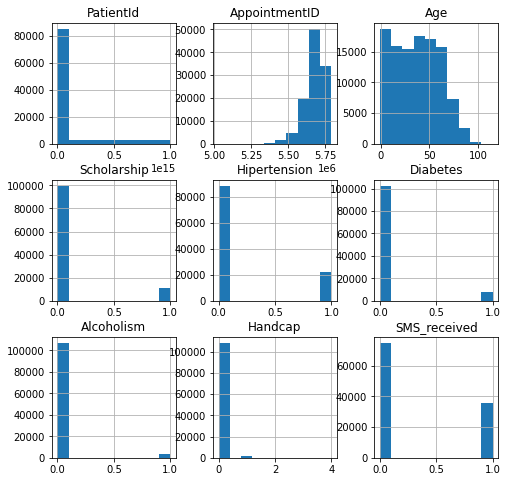

In [186]:
#Lets have a pictoril view of the features in  the dataset
no_show_df.hist(figsize=(8,8));

From the pictorial view above, we can can have a fair knowledge about the following
1. Most of the patients are not alcoholics
2. Most of them are not diabetic
3. More than two thirds of them recived sms
4. Most of them were not hypetensive
5. Most of them had sponsorship
6. No patient had more than 1 predicament with a larger number having no      predicament


In [187]:
# Loking at the overviw of the dataset
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


After going through the structure of the dataset, the following cleaning should be done to it
1. The appointment and scheduled datatype should be timestamp
2. The data type of Alcoholism, diabetes and hipertension should be boolean
3. The age values of 0 and -1 can be replaced by the mean age
4. Datatypes of the Scholarship,Hipertension, diabetes, alcoholism and SMS_recieved column  shold be changed from int to bool


### Data Cleaning


In [188]:
#Lets covert the datatype of the schedueday to datetime
no_show_df['ScheduledDay']=pd.to_datetime(no_show_df['ScheduledDay'])

In [189]:
#Lets do same to the AppointmentDay column. Convert its datatype to datetime
no_show_df['AppointmentDay']=pd.to_datetime(no_show_df['AppointmentDay'])

In [190]:
# Lets also change the datatypes of the Scholarship,Hipertension, diabetes, alcoholism and SMS_recieved column from int to bool
no_show_df=no_show_df.astype({'Scholarship': bool, 'Hipertension': bool, 'Diabetes': bool, 'Alcoholism':bool, 'SMS_received':bool})

In [191]:
#Verify if the datatype changes to the data types has taken effect
no_show_df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                      bool
Hipertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handcap                         int64
SMS_received                     bool
No-show                        object
dtype: object

In [192]:
#A look at the effect on the changes in the datatype to the rows
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,No


Lets deal with the age issue we encountered early on. The issue of having -1 and 0 as ages

In [193]:
#Lets write a query statement to look at the rows with Age as 0
no_show_df.query('Age==0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,False,False,False,False,0,False,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,False,False,False,False,0,False,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,False,False,False,False,0,True,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,False,False,False,False,0,False,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,False,False,False,False,0,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,False,False,False,False,0,False,No
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,False,False,False,False,0,False,No
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,False,False,False,False,0,False,No
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,False,False,False,False,0,False,No


The results right above shows that 3539 rows have Age as 0.
If we drop them, we loose a good chunk of our dataset. 
Lets replace it with the mean age

In [194]:
#calcualting the mean age
no_show_df['Age'].mean()

37.08887421173107

The mean age is 37.088874. Lets repalce the zero ages with the whole number 37 to make analysis easier

In [195]:
#Lets replace Age with 37
no_show_df.loc[no_show_df['Age']==0, 'Age']=37

In [196]:
#We query our dataset to see if change has taken place
no_show_df.query('Age==0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [197]:
#We do the same for the -1 Age
no_show_df.loc[no_show_df['Age']==-1, 'Age']=37

In [198]:
#We verify our results
no_show_df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Lets convert all column names into lower cases and sepearte two name columns with underscores

In [199]:
#Code to change all column names
no_show_df.columns = ['patient_id','appointment_id','gender','scheduled_day','appointment_day','age','neighbourhood','scholarship','hypertension','diabetes','alcoholism','handcap','sms_received','no_show']

In [200]:
no_show_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Does sponsorship influences a patients' ability of showing up for an appointment)

In [201]:
# Number of patients which shows up for appointment and those who dont
no_show_df.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [202]:
# Number of patients who have sponsorship and those who dont.
no_show_df.scholarship.value_counts()

False    99666
True     10861
Name: scholarship, dtype: int64

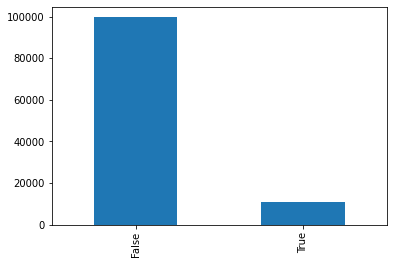

In [203]:
#We will also look at the visualization of the patient scholarship distribtion
no_show_df['scholarship'].value_counts().plot(kind='bar');

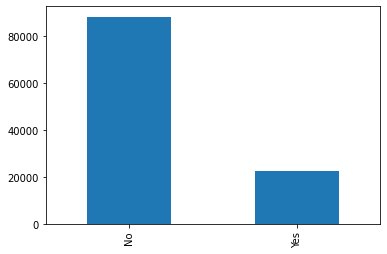

In [204]:
#We will look at a visualization of the apointment turnup. 
no_show_df['no_show'].value_counts().plot(kind='bar');

The first bar chart above shows that majority of the families are not on sponsorship. The second proves that most patients dont show up for appointment. Now lets see if sponsorship influence a patient's decision ,to turn up for appointment

In [205]:
#Relationship between scholarship and no-show
no_show_df.groupby('scholarship')['no_show'].value_counts()

scholarship  no_show
False        No         79925
             Yes        19741
True         No          8283
             Yes         2578
Name: no_show, dtype: int64

We can deduce the following from the results above
1. Number of patients who are not on sponsorship and does not show up for appointments are 79925
2. Number of patients who are not on sponsorship and does show up for appointments are 19741
3. Number of patients who are on sponsorship and does not show up for appointments are 8283
4. Number of patients who are on sponsorship and does show up for appointments are 2578

Lets visualize this to have a better understanding

In [206]:
graph =no_show_df.groupby('scholarship')['no_show'].value_counts()

In [207]:
#We write a function to visualize our plot to avoid repetitive code
def myplot(bar,graph, title, xlabel, ylabel):
    plt.bar(bar,graph)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

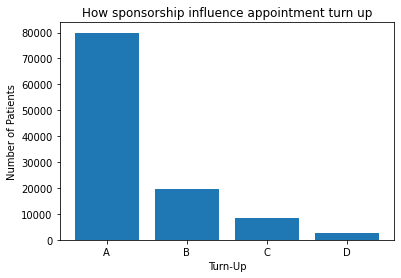

In [208]:
#We call the myplot function to give us a distribution of how sponsorship influence appointment turnup
myplot(['A','B','C','D'],graph,"How sponsorship influence appointment turn up","Turn-Up","Number of Patients")

Key
<ul>
<li>A. Patients who are not on sponsorship and does not show up for appointments</li>
<li>B. Patients who are not on sponsorship and does show up for appointments</li>
<li>C. Patients who are on sponsorship and does not show up for appointments</li>
<li>D. Patients who are on sponsorship and does show up for appointments</li>
</ul>

We can deduce from the plot above that
1. Nearly 80000 patients dont receive sponsorship and do not turn up for appointments.
2. Nearly 20000 patients dont receive sponsorship and do turn up for appointments.
3. Over 8000 patients receive sponsorship but do not show up for appointments.
4. Over 2000 patients receive sponsorship and do show up for appointments

This confirms what we saw in the cell we ran this line of code

no_show_df.groupby('scholarship')['no_show'].value_counts()

### Research Question 2  (Is the allocation of scholarships influenced by Gender)

In [209]:
# A look at the gender distribution
no_show_df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

From the results above, there are 71840 females and 38687 males

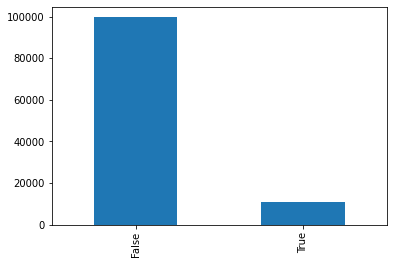

In [210]:
#A relook at the visualization of the patient scholarship distribtion
no_show_df['scholarship'].value_counts().plot(kind='bar');

Lets verify if sponshorship is influenced by gender

In [211]:
no_show_df.groupby('scholarship')['gender'].value_counts()

scholarship  gender
False        F         62987
             M         36679
True         F          8853
             M          2008
Name: gender, dtype: int64

We can deduce from the results in the cell above that
1. 62987 female patients who dont receive sponsorship
2. 36679 male patients who dont receive sponsorship
3. 8853 female patients who receive sponsorship
4. 2008 male patients who recieve sponsorship

In [212]:
#We draw a bar chart to clearly understand this relationships
graph=no_show_df.groupby('scholarship')['gender'].value_counts()

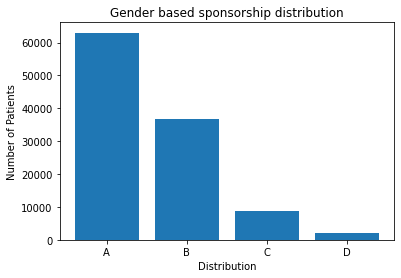

In [213]:
#We call the myplot function we created in cell 82 to visualize the Gender based sponsorship distribution
myplot(['A','B','C','D'],graph,"Gender based sponsorship distribution","Distribution","Number of Patients")

Key
<ul>
<li>A. Female patients who dont receive sponsorship</li>
<li>B. Male patients who dont receive sponsorship</li>
<li>C. Female patients who receive sponsorship</li>
<li>D. Male patients who receive sponsorship</li>
</ul>

We can deduce from the plot above that
1. Over 60000 female patients dont receive sponsorship
2. Over 30000 male patients dont receive sponsorship
3. Over 8000 female patients receive sponsorship
4. A little above 2000 male patients recieve sponsorship

This confirms what we saw in the cell we ran this line of code

no_show_df.groupby('scholarship')['gender'].value_counts()

<a id='conclusions'></a>
## Conclusions

From my findings I can conclude that
1. Scholarships have a very little impact on patients turning up for appiontments. 
2. Though the number of patients benefitting from scholarship funds are low, majority of these funds goes to females. 


### Limitation
If the place of abode of the patient should have been in the dataset, we could have found out if the sponsorship money was enough depending on how far the patient have to travel to their appointment locations. This factor could have helped determine if sponsorship funds were enough for patients especially for those who are on sponsorship but does not show up for appointments.
